In [1]:
# Problem
# f1 = ln(x1^2+x2^2) - sin(x1x2) - ln pi
# f2 = e^(x1-x2) + cos(x1x2)

Converged at iteration: 43
Gradient Descent Approximataion x: [-1.69330856 -1.53809991]


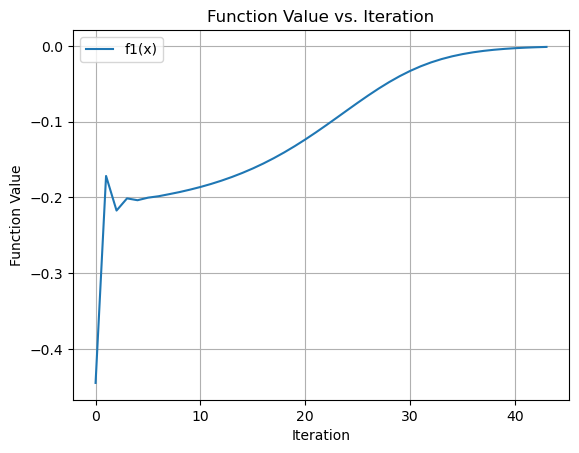

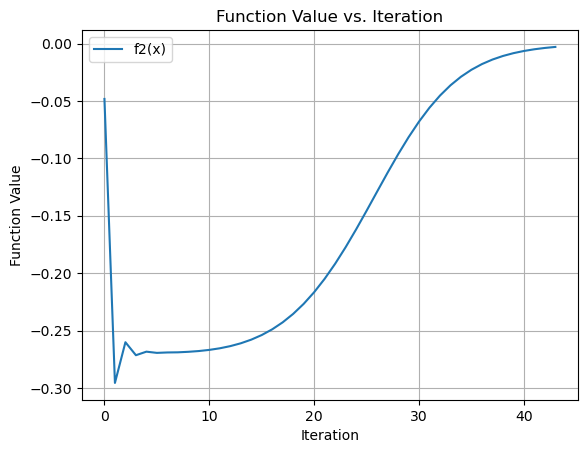

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def f1(x):
    
    return np.log(x[0] ** 2 + x[1] ** 2) - np.sin(x[0] * x[1]) - np.log(np.pi)

def f2(x):
    return np.exp(x[0] - x[1]) + np.cos(x[0] * x[1])



def f1_partial_x1 (x):
    
    return 1/(x[0] ** 2 + x[1] ** 2) * 2 * x[0] - x[1] * np.cos(x[0] * x[1])

def f2_partial_x1 (x):
    
    return np.exp(x[0]-x[1]) - x[1] * np.sin(x[0] * x[1])


def f1_partial_x2 (x):
    
    return 1/(x[0] ** 2 + x[1] ** 2) * 2 * x[1] - x[0] * np.cos(x[0] * x[1])

def f2_partial_x2 (x):
    
    return - np.exp(x[0]-x[1]) - x[0] * np.sin(x[0] * x[1])


# Define g and its gradient
def g(x):
    return f1(x) ** 2 + f2(x) ** 2 

def gradient_g(x):
    return np.array([
        2 * f1(x) * f1_partial_x1(x) + 2 * f2(x) * f2_partial_x1(x),
        2 * f1(x) * f1_partial_x2(x) + 2 * f2(x) * f2_partial_x2(x)
    ])



# Initial values
x = np.zeros(2)
tol = 0.00001
max_iter = 100000

f1_values = []
f2_values = []

x = [-2, -1] # guess initial value

f1_values.append(f1(x))
f2_values.append(f2(x))
        
# Gradient Descent
for i in range(max_iter):
         
    g_val = g(x)
    gradient = gradient_g(x)
    
    if np.linalg.norm(gradient) == 0:
        print("Zero gradient")
        
        f1_values.append(f1(x))
        f2_values.append(f2(x))

        break
    
    alpha = 0.1
    
    while g(x - alpha * gradient) >= g_val:
        alpha /= 2
    
    x = x - alpha * gradient
    
    if np.abs(g(x) - g_val) < tol:
    
        print("Converged at iteration:", i+1)
        f1_values.append(f1(x))
        f2_values.append(f2(x))

        
        break

    if i == max_iter - 1:
        print("Maximum iterations exceeded")
        f1_values.append(f1(x))
        f2_values.append(f2(x))

        break
        
    f1_values.append(f1(x))
    f2_values.append(f2(x))

    
# Calculate f1(x) at the final point x

print("Gradient Descent Approximataion x:", x)
plt.figure()
plt.plot(range(len(f1_values)), f1_values, label='f1(x)')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Function Value vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(range(len(f2_values)), f2_values, label='f2(x)')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Function Value vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()




Converged after 2 iterations.


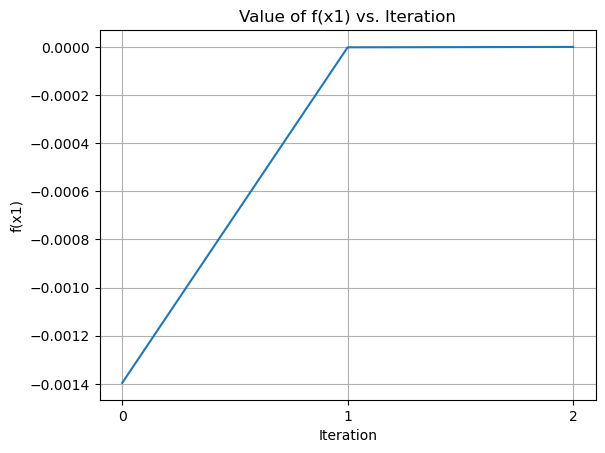

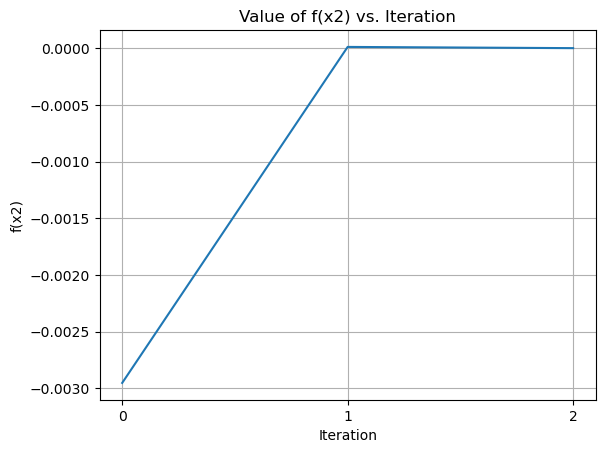

In [3]:


def f1 (x1, x2):
    
    return np.log(x1 ** 2 + x2 ** 2) - np.sin(x1 * x2) - np.log(np.pi)

def f2 (x1, x2):
    
    return np.exp(x1 - x2) + np.cos(x1 * x2)


def f1_partial_x1 (x1, x2):
    
    return 1/(x1 ** 2 + x2 ** 2) * 2 * x1 - x2 * np.cos(x1 * x2)

def f2_partial_x1 (x1, x2):
    
    return np.exp(x1-x2) - x2 * np.sin(x1 * x2)


def f1_partial_x2 (x1, x2):
    
    return 1/(x1 ** 2 + x2 ** 2) * 2 * x2 - x1 * np.cos(x1 * x2)

def f2_partial_x2 (x1, x2):
    
    return - np.exp(x1-x2) - x1 * np.sin(x1 * x2)




J = np.zeros((2,2))
max_iter = 100
tol = 0.000001

x1 = np.zeros(max_iter+1)
x2 = np.zeros(max_iter+1)


y = np.zeros((2,1))

x1[0] , x2[0] = x



iterations = []
f1_values = []
f2_values = []


f1_values.append(f1(x1[0], x2[0]))
f2_values.append(f2(x1[0], x2[0]))


for i in range (max_iter):
    

    J[0][0] = f1_partial_x1(x1[i], x2[i])
    J[1][0] = f2_partial_x1(x1[i], x2[i])

    J[0][1] = f1_partial_x2(x1[i], x2[i])
    J[1][1] = f2_partial_x2(x1[i], x2[i])



    J_inverse = np.linalg.inv(J)
    
    F_transpose = np.array([f1(x1[i], x2[i]), f2(x1[i], x2[i])])
    F = np.reshape(F_transpose, (F_transpose.shape[0], 1))

    y = -(J_inverse @ F)

    x1[i+1] = x1[i] + y[0][0]
    x2[i+1] = x2[i] + y[1][0]

    
    f1_values.append(f1(x1[i+1], x2[i+1]))
    f2_values.append(f2(x1[i+1], x2[i+1]))
 
    
    if np.max(np.abs([f1(x1[i+1], x2[i+1]), f2(x1[i+1], x2[i+1])])) < tol :
        
        print(f"Converged after {i+1} iterations.")
        break
        
    if max_iter == i + 1 :
        print(f"Not Converged in {i+1} iterations.")
              
iterations = range(len(f1_values))
plt.figure()
plt.plot(iterations, f1_values, linestyle='-', marker='')
plt.xlabel('Iteration')
plt.xticks(range(0, len(f1_values), 1))
plt.ylabel('f(x1)')
plt.title('Value of f(x1) vs. Iteration')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(iterations, f2_values, linestyle='-', marker='')
plt.xlabel('Iteration')
plt.xticks(range(0, len(f2_values), 1))
plt.ylabel('f(x2)')
plt.title('Value of f(x2) vs. Iteration')
plt.grid(True)
plt.show()


In [4]:
print("Newton's Method optimal solution:", x1[len(f1_values)-1],x2[len(f1_values)-1])

Newton's Method optimal solution: -1.6915036266262526 -1.5405235199476794
